In [1]:
import pandas as pd
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 
    'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Class', 'Difficulty Level'
]


In [3]:
train_df = pd.read_csv('train.csv', header=None, names=columns)
test_df = pd.read_csv('test.csv', header=None, names=columns)

In [4]:
full_df = pd.DataFrame(pd.concat([train_df, test_df], axis=0).reset_index(drop=True))
full_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class,Difficulty Level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148513,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [5]:
X = full_df.drop(['Class', 'Difficulty Level'], axis=1)  # Features
y = full_df['Class']  # Target variable


In [6]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
148513,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00


In [7]:
y

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
148512     normal
148513     normal
148514       back
148515     normal
148516      mscan
Name: Class, Length: 148517, dtype: object

In [8]:
cat_cols = ['protocol_type', 'service', 'flag']
binary_cols = ['land', 'num_failed_logins', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']
discrete_cols = ['urgent', 'hot', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 
                 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 
                 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
                 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 
                 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
cont_cols = ['duration', 'src_bytes', 'dst_bytes', 'logged_in', 'num_compromised', 'num_root', 'num_file_creations']





In [9]:
scaler = RobustScaler()
X_scaled = X.copy()
X_scaled[cont_cols + discrete_cols] = scaler.fit_transform(X[cont_cols + discrete_cols])


In [10]:

X_encoded = pd.get_dummies(X_scaled, columns=cat_cols)

In [11]:

y

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
148512     normal
148513     normal
148514       back
148515     normal
148516      mscan
Name: Class, Length: 148517, dtype: object

In [12]:

y_encoded = (y != 'normal').astype(int)
y_encoded

0         0
1         0
2         1
3         0
4         0
         ..
148512    0
148513    0
148514    1
148515    0
148516    1
Name: Class, Length: 148517, dtype: int32

In [13]:
pca = PCA(n_components=20)
X_reduced = pca.fit_transform(X_encoded)

In [14]:
X_reduced

array([[-1.45388376e+02, -3.40621043e+01, -2.75019361e+02, ...,
        -4.64817662e-01, -8.94879236e-02,  6.44934280e-01],
       [-1.46629330e+02, -3.40616236e+01, -2.74999153e+02, ...,
        -2.31659031e-02, -2.94599393e-01,  3.27907849e-01],
       [-1.47154495e+02, -3.40617439e+01, -2.75005524e+02, ...,
         3.35086839e-03,  5.11809425e-01, -9.75762917e-02],
       ...,
       [ 4.90262172e+01, -1.95475538e+01, -2.76962557e+02, ...,
        -2.61074855e-01,  8.65564211e-03, -1.14254079e-01],
       [-1.47003415e+02, -3.39882318e+01, -2.75008006e+02, ...,
         7.43812826e-01, -5.00087011e-01, -1.99411336e-01],
       [-1.47154496e+02, -3.40617547e+01, -2.75005795e+02, ...,
        -6.19455673e-01, -4.76512120e-01, -4.25161809e-01]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_encoded, test_size=0.2)


In [16]:
classifiers = {
    "Naive Bayes": GaussianNB(),
    "k nearest neighbour":KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=2)
}

In [17]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [18]:
results = []

In [19]:
def plot_confusion_matrices_side_by_side(cm_original, cm_reduced, clf_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot confusion matrix for original features
    sns.heatmap(cm_original, annot=True, fmt="d", cmap="Blues", ax=axes[0], cbar=False)
    axes[0].set_title(f'{clf_name} Confusion Matrix (Original Features)')
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')
    
    # Plot confusion matrix for PCA reduced features
    sns.heatmap(cm_reduced, annot=True, fmt="d", cmap="Blues", ax=axes[1], cbar=False)
    axes[1].set_title(f'{clf_name} Confusion Matrix (PCA Features)')
    axes[1].set_xlabel('Predicted Labels')
    axes[1].set_ylabel('True Labels')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

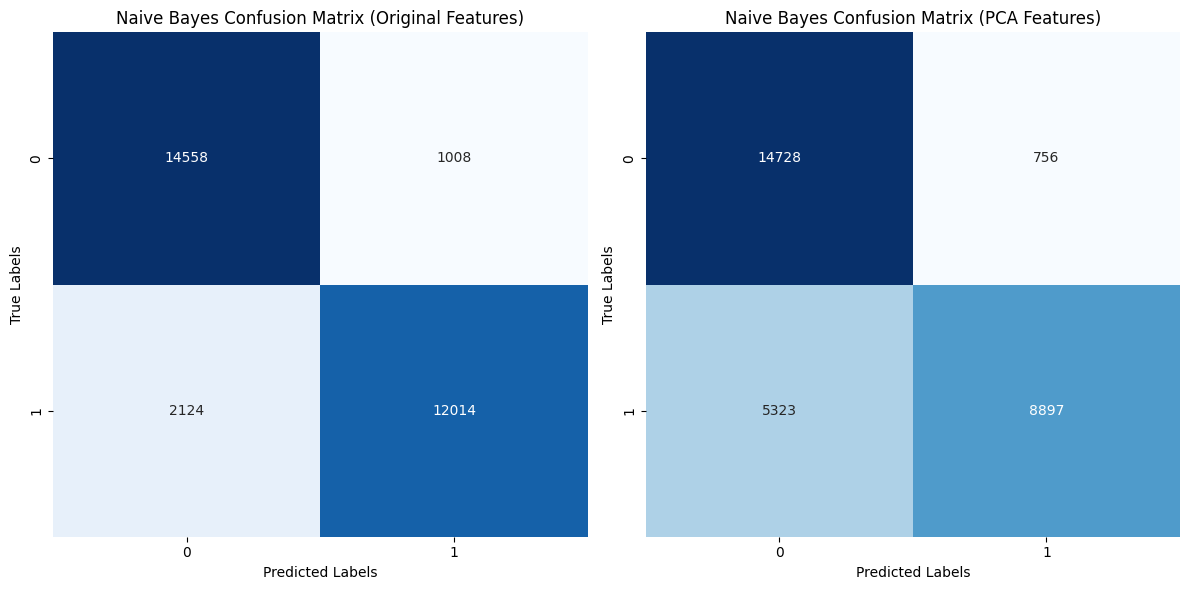

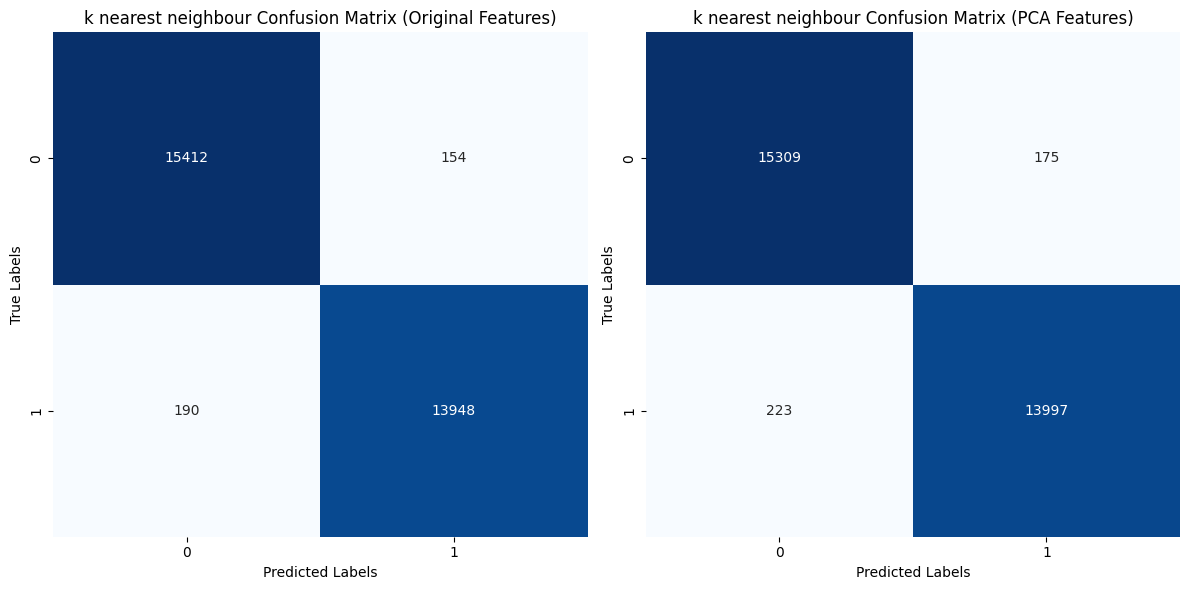

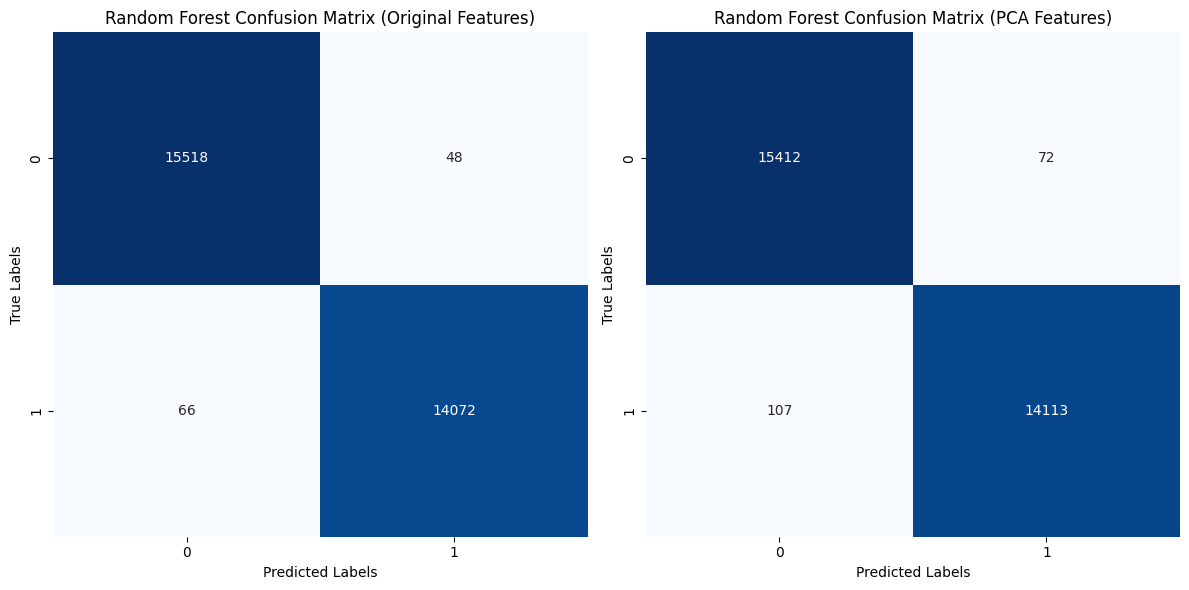

In [20]:
for clf_name, clf in classifiers.items():
    # Train on original features
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Train on PCA reduced features
    clf.fit(X_train_reduced, y_train_reduced)
    y_pred_reduced = clf.predict(X_test_reduced)
    
    # Evaluate performance (Confusion matrix and classification report)
    cm_original = confusion_matrix(y_test, y_pred)
    cm_reduced = confusion_matrix(y_test_reduced, y_pred_reduced)
    report_original = classification_report(y_test, y_pred)
    report_reduced = classification_report(y_test_reduced, y_pred_reduced)
    
    # Collect results for comparison
    results.append({
        "Model": clf_name,
        "Confusion Matrix (Original)": cm_original,
        "Confusion Matrix (PCA)": cm_reduced,
        "Report (Original)": report_original,
        "Report (PCA)": report_reduced,
        "Accuracy (Original)": accuracy_score(y_test, y_pred),
        "Accuracy (PCA)": accuracy_score(y_test_reduced, y_pred_reduced)
    })
    plot_confusion_matrices_side_by_side(cm_original, cm_reduced, clf_name)

plt.show()

In [21]:
results_df = pd.DataFrame(results)

In [22]:
print("\nComparison of Accuracy:")
print(results_df[["Model", "Accuracy (Original)", "Accuracy (PCA)"]])


Comparison of Accuracy:
                 Model  Accuracy (Original)  Accuracy (PCA)
0          Naive Bayes             0.894560        0.795347
1  k nearest neighbour             0.988419        0.986601
2        Random Forest             0.996162        0.993974


In [23]:
for clf_name in classifiers:
    print(f"\n{clf_name} Confusion Matrix (Original features):")
    print(results_df.loc[results_df['Model'] == clf_name, 'Confusion Matrix (Original)'].values[0])
    
    print(f"\n{clf_name} Confusion Matrix (PCA features):")
    print(results_df.loc[results_df['Model'] == clf_name, 'Confusion Matrix (PCA)'].values[0])



Naive Bayes Confusion Matrix (Original features):
[[14558  1008]
 [ 2124 12014]]

Naive Bayes Confusion Matrix (PCA features):
[[14728   756]
 [ 5323  8897]]

k nearest neighbour Confusion Matrix (Original features):
[[15412   154]
 [  190 13948]]

k nearest neighbour Confusion Matrix (PCA features):
[[15309   175]
 [  223 13997]]

Random Forest Confusion Matrix (Original features):
[[15518    48]
 [   66 14072]]

Random Forest Confusion Matrix (PCA features):
[[15412    72]
 [  107 14113]]
